#### GC and holes shape descriptor

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from Import_Functions import import_imgs
import measure_util as mu
import pandas as pd

In [2]:
master_seg_folder = r"directory to the test image folder"

In [ ]:
all_gc_dfs= mu.batch_measure_shape(master_seg_folder,mask_name="gc.tif",shape_parameters=["cell_id", "obj_id", "surface_area", "volume" , "surface_to_volume_ratio", "sphericity", "aspect_ratio","solidity"])

In [4]:
# now group the measurements
# gc
gc_number_by_cell_df,gc_size_by_cell_df, gc_morphology_by_obj_df,_ = mu.group_gc_measure_df(
    all_gc_dfs,
    number_parameters=["cell_id","obj_number","stage"],
    size_parameters=["cell_id", "surface_area", "volume", "surface_to_volume_ratio","stage"])

In [5]:
gc_size_by_cell_df.head()

,cell_id,surface_area,volume,surface_to_volume_ratio,stage
0,20220304_L1\10_2,16.858368,5.13664,3.281983,L1
1,20220304_L1\9_1,17.272527,5.44768,3.170621,L1
2,20220304_L1\8_1,11.310037,2.67008,4.235842,L1
3,20220304_L1\7_1,17.677742,5.64608,3.130976,L1
4,20220304_L1\5_1,20.212355,6.91584,2.922617,L1


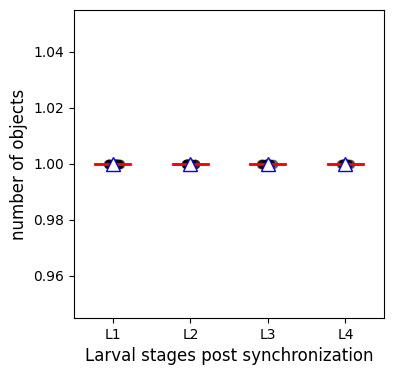

In [6]:
gc_numb_plot = mu.box_plot(gc_number_by_cell_df,measurement_to_plot="obj_number",y_axis_label="number of objects")

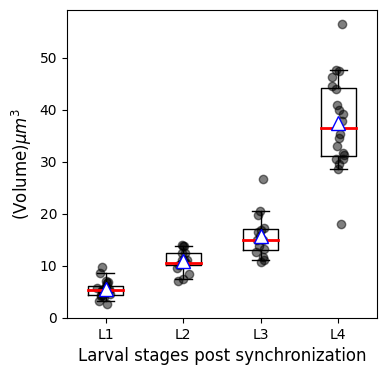

In [7]:
gc_volume_plot = mu.box_plot(gc_size_by_cell_df, measurement_to_plot="volume", y_axis_label="(Volume)" + r"$\mu m^{3}$")

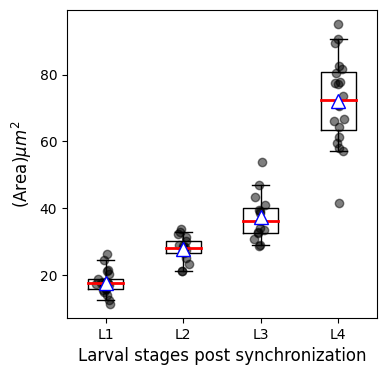

In [8]:
gc_suface_plot = mu.box_plot(gc_size_by_cell_df, measurement_to_plot="surface_area", y_axis_label="(Area)" + r"$\mu m^{2}$")

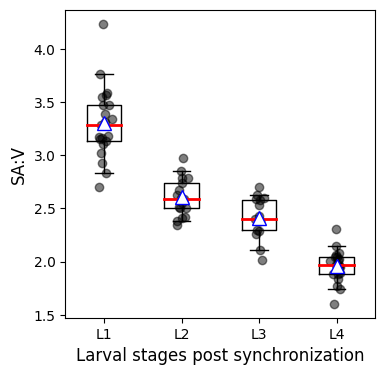

In [9]:
gc_suface_plot = mu.box_plot(gc_size_by_cell_df, measurement_to_plot="surface_to_volume_ratio", y_axis_label="SA:V")

In [10]:
gc_morphology_by_obj_df.head(1)

,cell_id,obj_id,sphericity,aspect_ratio,solidity,stage
0,20220304_L1\10_2,1,0.853994,0.538791,0.915583,L1


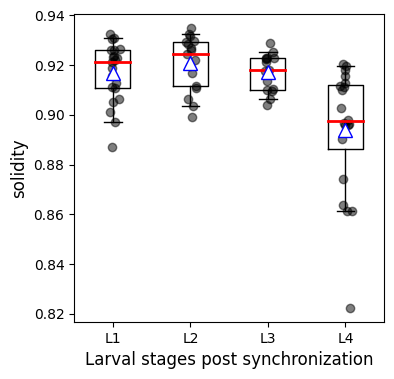

In [11]:
gc_sphericity_plot = mu.box_plot(gc_morphology_by_obj_df, measurement_to_plot="solidity", y_axis_label="solidity")

###### analyze holes in gc

In [ ]:
all_hole_dfs = mu.batch_measure_shape(master_seg_folder,mask_name="holes.tif",shape_parameters=["cell_id", "obj_id", "surface_area", "volume" , "surface_to_volume_ratio", "sphericity", "aspect_ratio","solidity"])

In [15]:
# holes
hole_number_by_cell_df, hole_size_by_cell_df, hole_morphology_by_obj_df, hole_size_by_obj_df = mu.group_gc_measure_df(
    all_hole_dfs,
    number_parameters=["cell_id","obj_number","stage"],
    size_parameters=["cell_id", "surface_area", "volume", "surface_to_volume_ratio","stage"])

In [16]:
hole_number_by_cell_df = hole_number_by_cell_df.dropna(axis=0)

In [ ]:
hole_number_by_cell_df

In [ ]:
mu.box_plot(hole_number_by_cell_df, measurement_to_plot="obj_number", y_axis_label="number of objects")

In [ ]:
# # save dataframes as csv
# gc_number_by_cell_df.to_csv(f"{master_result_dir}/gc_number.csv")
# gc_size_by_cell_df.to_csv(f"{master_result_dir}/gc_size.csv")
# gc_morphology_by_obj_df.to_csv(f"{master_result_dir}/gc_morphology.csv")

# hole_number_by_cell_df.to_csv(f"{master_result_dir}/hole_number.csv")
# hole_size_by_cell_df.to_csv(f"{master_result_dir}/hole_size_total.csv")
# morphology_by_obj_df.to_csv(f"{master_result_dir}/hole_morphology.csv")
# hole_size_by_obj_df.to_csv(f"{master_result_dir}/hole_size_individual.csv")